In [311]:
import pandas as pd

In [341]:
results = pd.read_csv('../results.csv', names=['name', 'repo', 'xmatch', 'blue', 'samples', 'date', 'model'])
results.head(1)

,name,repo,xmatch,blue,samples,date,model
0,normal,all,7.38,77.54,149,15-05-2022_23-38-53,/home/arminz/scratch/Xoutputs/train_source/che...


In [342]:
def print_stats(df):
    print(len(df))
    print(f"xmatch: {(df['xmatch'] * df['samples']).sum() / df['samples'].sum():.2f}", f"{df['xmatch'].mean():.2f}", f"{df['xmatch'].median():.2f}")
    print(f"blue: {(df['blue'] * df['samples']).sum() / df['samples'].sum():.2f}", f"{df['blue'].mean():.2f}", f"{df['blue'].median():.2f}")    

In [343]:
# print_stats(results)

In [344]:
print_stats(results[(results['repo'] != 'all') & results['model'].apply(lambda d: 'adapted' in d and not 'reverse' in d)])

7
xmatch: 22.68 21.99 16.67
blue: 74.30 73.71 78.15


In [345]:
print_stats(results[(results['repo'] != 'all') &  ~results['model'].apply(lambda d: 'adapted' in d)])

7
xmatch: 7.21 7.77 8.33
blue: 74.26 74.54 73.59


In [346]:
print_stats(results[(results['repo'] != 'all') &  results['model'].apply(lambda d: 'adapted' in d and 'reverse' in d)])

7
xmatch: 10.31 11.07 10.00
blue: 76.76 77.49 75.57


In [347]:
results_ = results.set_index('repo')

In [337]:
results_adapted = results[(results['repo'] != 'all') & results['model'].apply(lambda d: 'adapted' in d and not 'reverse' in d)]

In [338]:
results_excluded = results[(results['repo'] != 'all') &  ~results['model'].apply(lambda d: 'adapted' in d)]

In [339]:
results_m = results[(results['repo'] != 'all') &  results['model'].apply(lambda d: 'adapted' in d and 'reverse' in d)]

In [322]:
a = results_excluded.sort_values(by='samples')#.set_index('repo')
b = results_adapted.sort_values(by='samples')#.set_index('repo')
c = results_m.sort_values(by='samples')#.set_index('repo')

In [323]:
import matplotlib.pyplot as plt

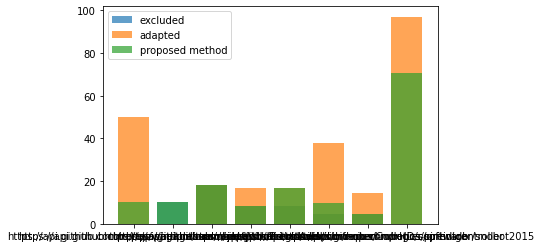

In [324]:
plt.bar(a['repo'], a['xmatch'], alpha=0.7, label='excluded')
plt.bar(b['repo'], b['xmatch'], alpha=0.7, label='adapted')
plt.bar(c['repo'], c['xmatch'], alpha=0.7, label='proposed method')
plt.legend()


<BarContainer object of 8 artists>

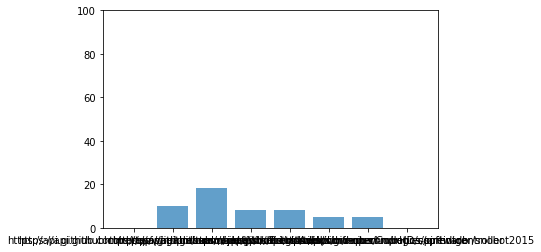

In [325]:
fig, ax = plt.subplots(1)
ax.set_ylim(ymax=100)
plt.bar(a['repo'], a['xmatch'], alpha=0.7, label='excluded')

<BarContainer object of 8 artists>

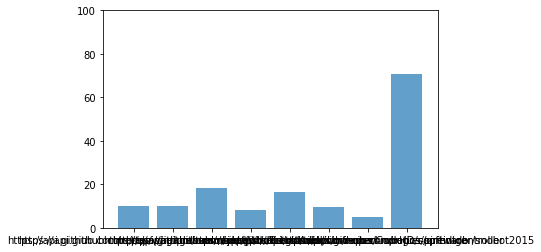

In [326]:
fig, ax = plt.subplots(1)
ax.set_ylim(ymax=100)
plt.bar(c['repo'], c['xmatch'], alpha=0.7, label='proposed method')



In [327]:
a

,name,repo,xmatch,blue,samples,date,model
8,normal,https://api.github.com/repos/realm/realm-java,0.00,84.23,10,16-05-2022_00-26-31,/home/arminz/scratch/Xoutputs/train_source/che...
9,normal,https://api.github.com/repos/wordpress-mobile/...,10.00,89.23,10,16-05-2022_00-26-54,/home/arminz/scratch/Xoutputs/train_source/che...
7,normal,https://api.github.com/repos/rstudio/rstudio,18.18,73.59,11,16-05-2022_00-26-09,/home/arminz/scratch/Xoutputs/train_source/che...
5,normal,https://api.github.com/repos/dstockwell/chromium,8.33,61.44,12,16-05-2022_00-25-22,/home/arminz/scratch/Xoutputs/train_source/che...
6,normal,https://api.github.com/repos/ihmcrobotics/ihmc...,8.33,61.98,12,16-05-2022_00-25-47,/home/arminz/scratch/Xoutputs/train_source/che...
3,normal,https://api.github.com/repos/orientechnologies...,4.76,73.25,21,16-05-2022_00-24-12,/home/arminz/scratch/Xoutputs/train_source/che...
4,normal,https://api.github.com/repos/CoprHD/coprhd-con...,4.76,78.07,21,16-05-2022_00-24-54,/home/arminz/scratch/Xoutputs/train_source/che...
2,normal,https://api.github.com/repos/pjreiniger/snobot...,0.00,69.43,34,16-05-2022_00-23-18,/home/arminz/scratch/Xoutputs/train_source/che...


In [328]:
c

,name,repo,xmatch,blue,samples,date,model
24,normal,https://api.github.com/repos/realm/realm-java,10.00,88.15,10,17-05-2022_12-16-39,/home/armin/scratch/Xoutputs/adapted/reverse/t...
25,normal,https://api.github.com/repos/wordpress-mobile/...,10.00,85.62,10,17-05-2022_12-16-54,/home/armin/scratch/Xoutputs/adapted/reverse/t...
23,normal,https://api.github.com/repos/rstudio/rstudio,18.18,74.79,11,17-05-2022_12-51-15,/home/armin/scratch/Xoutputs/adapted/reverse/t...
21,normal,https://api.github.com/repos/dstockwell/chromium,8.33,67.34,12,17-05-2022_12-15-54,/home/armin/scratch/Xoutputs/adapted/reverse/t...
22,normal,https://api.github.com/repos/ihmcrobotics/ihmc...,16.67,75.57,12,17-05-2022_12-28-14,/home/armin/scratch/Xoutputs/adapted/reverse/t...
19,normal,https://api.github.com/repos/orientechnologies...,9.52,72.38,21,17-05-2022_12-15-18,/home/armin/scratch/Xoutputs/adapted/reverse/t...
20,normal,https://api.github.com/repos/CoprHD/coprhd-con...,4.76,78.58,21,17-05-2022_12-15-41,/home/armin/scratch/Xoutputs/adapted/reverse/t...
18,normal,https://api.github.com/repos/pjreiniger/snobot...,70.59,94.71,34,17-05-2022_15-33-13,/home/armin/scratch/Xoutputs/adapted/reverse/t...


In [329]:
b['samples'] == a['samples']

ValueError: Can only compare identically-labeled Series objects